In [16]:
!pip install split_folders

In [1]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [45]:
#!unzip /content/gdrive/MyDrive/gdriveupmebot/archive.zip

In [6]:
main_dir="/content/dataset/"

# Importing Libraries

In [4]:
import os 
from matplotlib.image import imread
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import splitfolders as sf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Conv2D,MaxPool2D,Flatten,Dense,Dropout
from tensorflow.keras.callbacks import EarlyStopping
import pandas as pd
import numpy as np
from sklearn.metrics import classification_report,confusion_matrix

**Example**

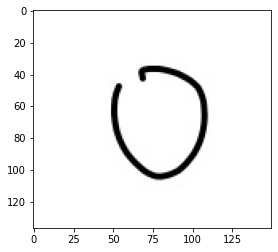

In [7]:
plt.imshow(imread(main_dir+"0/"+"87994.jpg"))

# Reshaping data

In [8]:
imread(main_dir+"0/"+"87994.jpg").shape

(137, 150, 3)

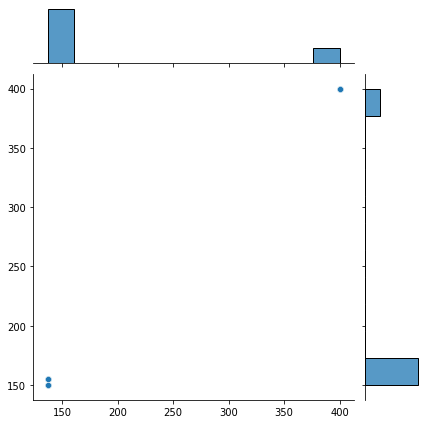

In [9]:
x=[]
y=[]
for i in os.listdir(main_dir+"0"):
  temp=imread(main_dir+"0/"+i)
  dim1,dim2,channel=temp.shape
  x.append(dim1)
  y.append(dim2)

sns.jointplot(x=x,y=y)

In [12]:
for classes in os.listdir("/content/dataset"):
  if classes != ".directory":
    os.mkdir("/content/Resized_channelReduces_data/"+classes)

In [13]:
for classes in os.listdir("/content/dataset"):
  if classes != ".directory":
    for img in os.listdir("/content/dataset/"+classes):
      if img != ".directory":
        Image.open("/content/dataset/"+classes+"/"+img).resize((150,150)).save("/content/Resized_channelReduces_data/"+classes+"/"+img)

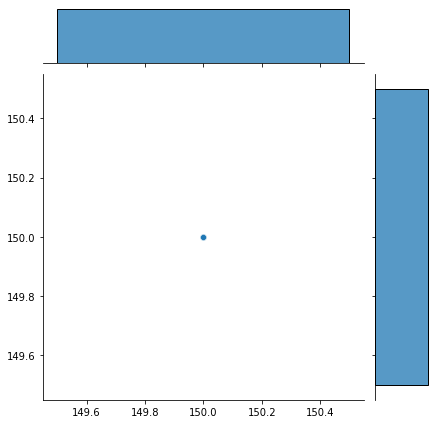

In [14]:
main_dir="/content/Resized_channelReduces_data/"

x=[]
y=[]
for i in os.listdir(main_dir+"0"):
  temp=imread(main_dir+"0/"+i)
  dim1,dim2,channel=temp.shape
  x.append(dim1)
  y.append(dim2)

sns.jointplot(x=x,y=y)

In [15]:
shape=imread(main_dir+"0/"+"87994.jpg").shape

**Splitting data to train test and validation**

In [18]:
sf.ratio(main_dir,output="/content/Splited_Data",ratio=(.7,.1,.2))

Copying files: 10071 files [00:01, 6003.55 files/s]


**Loading images as data**

In [20]:
generator=ImageDataGenerator(rotation_range=5,
                             width_shift_range=.1,
                             height_shift_range=.1,
                             zoom_range=.1,
                             rescale=1/255)

In [21]:
train=generator.flow_from_directory("/content/Splited_Data/train",target_size=(150,150))
val=generator.flow_from_directory("/content/Splited_Data/val",target_size=(150,150),shuffle=False)
test=generator.flow_from_directory("/content/Splited_Data/train",target_size=(150,150),shuffle=False)

Found 7041 images belonging to 19 classes.
Found 999 images belonging to 19 classes.
Found 7041 images belonging to 19 classes.


In [22]:
train.class_indices

{'0': 0,
 '1': 1,
 '2': 2,
 '3': 3,
 '4': 4,
 '5': 5,
 '6': 6,
 '7': 7,
 '8': 8,
 '9': 9,
 'add': 10,
 'dec': 11,
 'div': 12,
 'eq': 13,
 'mul': 14,
 'sub': 15,
 'x': 16,
 'y': 17,
 'z': 18}

# Model

In [24]:
es=EarlyStopping(patience=2)

In [32]:
model= Sequential()

model.add(Conv2D(filters=32,kernel_size=(5,5),activation="relu"))
model.add(MaxPool2D(pool_size=(5,5)))

model.add(Conv2D(filters=64,kernel_size=(3,3),activation="relu"))
model.add(MaxPool2D(pool_size=(3,3)))

model.add(Conv2D(filters=64,kernel_size=(3,3),activation="relu"))
model.add(MaxPool2D(pool_size=(3,3)))

model.add(Flatten())

model.add(Dense(64,activation="relu"))
model.add(Dropout(.4))

model.add(Dense(32,activation="relu"))
model.add(Dropout(.3))

model.add(Dense(19,activation="softmax"))

model.compile(loss="categorical_crossentropy",optimizer="adam",metrics=["accuracy"])


model.fit(train,validation_data=val,callbacks=[es],epochs=25)

Epoch 1/25
221/221 [==============================] - 51s 228ms/step - loss: 2.6866 - accuracy: 0.1459 - val_loss: 1.9985 - val_accuracy: 0.5035
Epoch 2/25
221/221 [==============================] - 50s 224ms/step - loss: 1.8063 - accuracy: 0.4299 - val_loss: 1.1037 - val_accuracy: 0.7077
Epoch 3/25
221/221 [==============================] - 48s 216ms/step - loss: 1.3450 - accuracy: 0.5783 - val_loss: 0.7948 - val_accuracy: 0.8018
Epoch 4/25
221/221 [==============================] - 49s 221ms/step - loss: 1.1114 - accuracy: 0.6478 - val_loss: 0.5967 - val_accuracy: 0.8428
Epoch 5/25
221/221 [==============================] - 47s 215ms/step - loss: 0.9362 - accuracy: 0.7039 - val_loss: 0.4701 - val_accuracy: 0.8789
Epoch 6/25
221/221 [==============================] - 47s 213ms/step - loss: 0.8540 - accuracy: 0.7324 - val_loss: 0.5216 - val_accuracy: 0.8398
Epoch 7/25
221/221 [==============================] - 47s 213ms/step - loss: 0.8479 - accuracy: 0.7333 - val_loss: 0.4492 - val_ac

# Evaluation

In [34]:
result=pd.DataFrame(model.history.history)

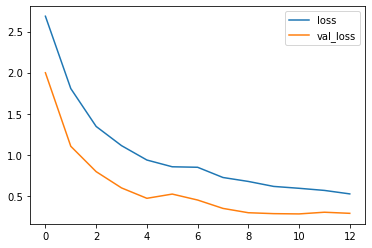

In [37]:
result[["loss","val_loss"]].plot()

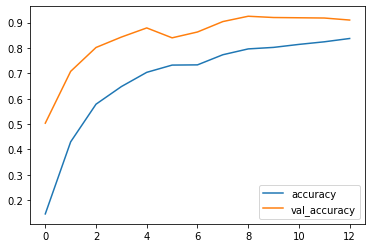

In [38]:
result[["accuracy","val_accuracy"]].plot()

In [40]:
prediction=np.argmax(model.predict(test), axis=-1)

In [43]:
print(classification_report(prediction,test.classes))

              precision    recall  f1-score   support

           0       0.87      0.88      0.87       408
           1       0.97      0.93      0.95       410
           2       0.85      0.91      0.88       284
           3       0.96      0.85      0.90       428
           4       0.91      0.95      0.93       351
           5       0.94      0.90      0.92       315
           6       0.89      0.95      0.92       380
           7       0.94      0.93      0.93       380
           8       0.91      0.93      0.92       378
           9       0.95      0.88      0.91       410
          10       0.98      0.97      0.97       421
          11       0.99      0.99      0.99       436
          12       0.93      0.99      0.96       405
          13       0.96      0.93      0.94       460
          14       0.96      0.97      0.96       398
          15       0.98      0.95      0.96       472
          16       0.87      0.93      0.90       295
          17       0.93    

In [44]:
print(confusion_matrix(prediction,test.classes))

[[360   0   1   2   7   0  13   0  16   7   0   0   0   0   2   0   0   0
    0]
 [  3 382   0   0   3   1   3   8   1   3   2   0   0   0   0   0   2   2
    0]
 [  3   0 259   2   0   2   0   5   0   0   1   0   0   0   1   0  11   0
    0]
 [  3   0  29 363   0   6   2   4   6   2   0   0   6   0   0   0   4   0
    3]
 [  4   0   0   0 335   0   0   0   0   1   1   0   0   0   0   0   3   7
    0]
 [  4   1   2   3   0 285  12   0   2   0   0   0   0   3   0   0   3   0
    0]
 [  6   0   0   0   4   3 362   0   1   3   0   0   0   0   1   0   0   0
    0]
 [  0   4  11   3   0   0   0 352   0   4   3   0   0   0   0   0   2   0
    1]
 [ 11   0   0   2   0   0   9   0 351   0   0   0   0   0   2   0   1   2
    0]
 [ 20   1   0   0   8   1   4   0  10 362   0   0   0   0   0   0   0   4
    0]
 [  1   5   0   0   5   1   0   1   0   0 407   0   0   0   0   0   1   0
    0]
 [  0   0   0   0   0   0   0   0   0   0   0 432   1   1   1   0   1   0
    0]
 [  0   0   0   1   0   0   